In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon, shapiro
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple

load data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
images = np.load('/content/drive/MyDrive/Arlette/Sets for Training /Dataset with iPhone/test_images_160x320.npy')
true_landamarks = np.load('/content/drive/MyDrive/Arlette/Sets for Training /Dataset with iPhone/test_landmarks.npy')

CNN_100 = np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_CNN_full_augmentation.npy')
UNET_100 = np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_UNET_full_augmentation.npy')

CNN_50 = np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_CNN_full_augmentation_50_.npy')
UNET_50 = np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_UNET_full_augmentation_50.npy')

CNN_25 = np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_CNN_full_augmentation_25.npy')
UNET_25 = np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_UNET_full_augmentation_25.npy')

calculate error

In [4]:
height, width = 160, 320

def landmark_error(y_true, y_pred, width, height):
    y_true_dn = y_true.copy()
    y_pred_dn = y_pred.copy()
    y_true_dn[:, :, 0] *= width
    y_true_dn[:, :, 1] *= height
    y_pred_dn[:, :, 0] *= width
    y_pred_dn[:, :, 1] *= height
    return np.sqrt(((y_true_dn - y_pred_dn)**2).sum(axis=2)).mean(axis=1)

errors_CNN_100      = landmark_error(true_landamarks, CNN_100, width, height)
errors_UNET_100     = landmark_error(true_landamarks, UNET_100, width, height)

errors_CNN_50   = landmark_error(true_landamarks, CNN_50, width, height)
errors_UNET_50  = landmark_error(true_landamarks, UNET_50, width, height)

errors_CNN_25      = landmark_error(true_landamarks, CNN_25, width, height)
errors_UNET_25     = landmark_error(true_landamarks, UNET_25, width, height)

In [5]:
# error arry
errors_dict = {"CNN_100": errors_CNN_100, "CNN_50": errors_CNN_50, "CNN_25": errors_CNN_25, "UNET_100": errors_UNET_100, "UNET_50": errors_UNET_50, "UNET_25": errors_UNET_25}

# calculate mean ± SD and median
print("Model\tDataset Size\tMean ± SD\tMedian")
for key, arr in errors_dict.items():
    model, size = key.split('_')
    mean_val = arr.mean()
    std_val = arr.std()
    median_val = np.median(arr)
    print(f"{model}\t{size}%\t{mean_val:.2f} ± {std_val:.2f}\t{median_val:.2f}")

Model	Dataset Size	Mean ± SD	Median
CNN	100%	7.94 ± 3.92	7.12
CNN	50%	6.61 ± 3.60	6.05
CNN	25%	8.54 ± 4.09	7.69
UNET	100%	2.85 ± 0.97	2.69
UNET	50%	4.33 ± 1.19	4.15
UNET	25%	4.05 ± 1.35	3.75


pixel error datasetsize

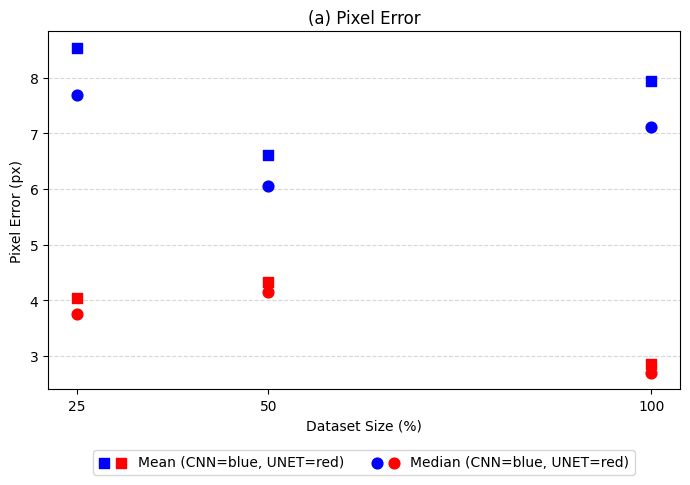

In [6]:
dataset_sizes = [25, 50, 100]

# Pixel error
mean_CNN = [errors_CNN_25.mean(), errors_CNN_50.mean(), errors_CNN_100.mean()]
median_CNN = [np.median(errors_CNN_25), np.median(errors_CNN_50), np.median(errors_CNN_100)]
mean_UNET = [errors_UNET_25.mean(), errors_UNET_50.mean(), errors_UNET_100.mean()]
median_UNET = [np.median(errors_UNET_25), np.median(errors_UNET_50), np.median(errors_UNET_100)]

fig, ax = plt.subplots(figsize=(7,5))

# Scatter plots
mean_handle_blue = ax.scatter(dataset_sizes, mean_CNN, color='blue', marker='s', s=60, zorder=5)
mean_handle_red = ax.scatter(dataset_sizes, mean_UNET, color='red', marker='s', s=60, zorder=5)
median_handle_blue = ax.scatter(dataset_sizes, median_CNN, color='blue', marker='o', s=60, zorder=6)
median_handle_red = ax.scatter(dataset_sizes, median_UNET, color='red', marker='o', s=60, zorder=6)

ax.set_xlabel('Dataset Size (%)')
ax.set_ylabel('Pixel Error (px)')
ax.set_title('(a) Pixel Error')
ax.set_xticks(dataset_sizes)
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

# Legend mit nur zwei Einträgen: Mean & Median, jeweils Blau+Rot nebeneinander
ax.legend(
    handles=[(mean_handle_blue, mean_handle_red), (median_handle_blue, median_handle_red)],
    labels=['Mean (CNN=blue, UNET=red)', 'Median (CNN=blue, UNET=red)'],
    handler_map={tuple: HandlerTuple(ndivide=None)},
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
    fontsize=10)

plt.tight_layout()
plt.show()


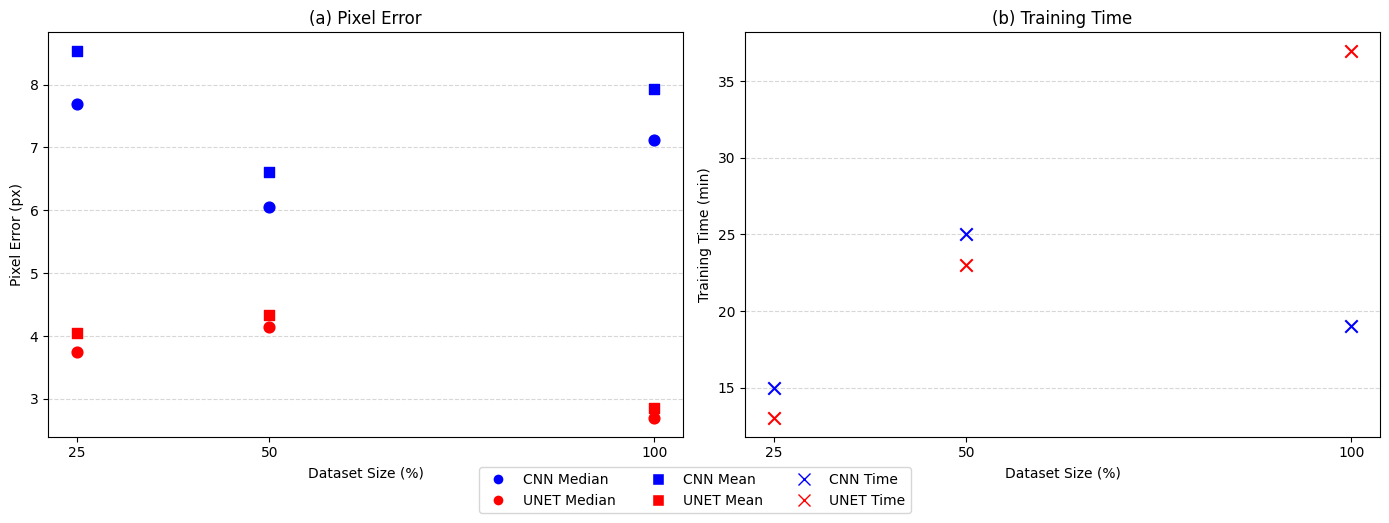

In [7]:
dataset_sizes = [25, 50, 100]

# pixel error
mean_CNN = [errors_CNN_25.mean(), errors_CNN_50.mean(), errors_CNN_100.mean()]
median_CNN = [np.median(errors_CNN_25), np.median(errors_CNN_50), np.median(errors_CNN_100)]
mean_UNET = [errors_UNET_25.mean(), errors_UNET_50.mean(), errors_UNET_100.mean()]
median_UNET = [np.median(errors_UNET_25), np.median(errors_UNET_50), np.median(errors_UNET_100)]

# training time
time_CNN = [15, 25, 19]
time_UNET = [13, 23, 37]

fig, axes = plt.subplots(1, 2, figsize=(14,5))

# plot a (left): pixel error
ax = axes[0]
# mean
ax.scatter(dataset_sizes, mean_CNN, color='blue', marker='s', s=60, zorder=5)
ax.scatter(dataset_sizes, mean_UNET, color='red', marker='s', s=60, zorder=5)
# median
ax.scatter(dataset_sizes, median_CNN, color='blue', marker='o', s=60, zorder=6)
ax.scatter(dataset_sizes, median_UNET, color='red', marker='o', s=60, zorder=6)

ax.set_xlabel('Dataset Size (%)')
ax.set_ylabel('Pixel Error (px)')
ax.set_title('(a) Pixel Error')
ax.set_xticks(dataset_sizes)
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

# plot b (right): training time
ax = axes[1]
ax.scatter(dataset_sizes, time_CNN, color='blue', marker='x', s=80, zorder=6)
ax.scatter(dataset_sizes, time_UNET, color='red', marker='x', s=80, zorder=6)

ax.set_xlabel('Dataset Size (%)')
ax.set_ylabel('Training Time (min)')
ax.set_title('(b) Training Time')
ax.set_xticks(dataset_sizes)
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

# one legend
handles = [
    plt.Line2D([0],[0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='CNN Median'),
    plt.Line2D([0],[0], marker='o', color='w', markerfacecolor='red', markersize=8, label='UNET Median'),
    plt.Line2D([0],[0], marker='s', color='w', markerfacecolor='blue', markersize=8, label='CNN Mean'),
    plt.Line2D([0],[0], marker='s', color='w', markerfacecolor='red', markersize=8, label='UNET Mean'),
    plt.Line2D([0],[0], marker='x', color='blue', markersize=8, lw=0, label='CNN Time'),
    plt.Line2D([0],[0], marker='x', color='red', markersize=8, lw=0, label='UNET Time')]

fig.legend(handles=handles, loc='lower center', ncol=3, fontsize=10, bbox_to_anchor=(0.5, -0.05))
plt.tight_layout()
plt.show()

statistics

In [8]:
# pairs for comparison
pairs = [
    ("CNN", "25% vs 50%", errors_CNN_25, errors_CNN_50),
    ("CNN", "25% vs 100%", errors_CNN_25, errors_CNN_100),
    ("CNN", "50% vs 100%", errors_CNN_50, errors_CNN_100),
    ("UNET", "25% vs 50%", errors_UNET_25, errors_UNET_50),
    ("UNET", "25% vs 100%", errors_UNET_25, errors_UNET_100),
    ("UNET", "50% vs 100%", errors_UNET_50, errors_UNET_100)]

results = []

for model, desc, group1, group2 in pairs:
    # pair differences
    diff = group1 - group2

    # sahpiro test normality
    shapiro_stat, shapiro_p = shapiro(diff)
    normality = "Yes" if shapiro_p > 0.05 else "No"

    # wilcoxon signed-rank test
    stat, p_val = wilcoxon(group1, group2)

    # effectsize r
    N = len(group1)
    z_val = (stat - N*(N+1)/4) / np.sqrt(N*(N+1)*(2*N+1)/24)
    r = abs(z_val) / np.sqrt(N)

    results.append({
        "Model": model,
        "Comparison": desc,
        "Shapiro-Wilk stat": round(shapiro_stat, 6),
        "Shapiro-Wilk p-value": round(shapiro_p, 6),
        "Normal?": normality,
        "Wilcoxon stat": stat,
        "Wilcoxon p-value": round(p_val, 10),
        "Effect size r": round(r, 4)})

df_results = pd.DataFrame(results)

In [9]:
df_results.head(6)

,Model,Comparison,Shapiro-Wilk stat,Shapiro-Wilk p-value,Normal?,Wilcoxon stat,Wilcoxon p-value,Effect size r
0,CNN,25% vs 50%,0.939934,0.000000,No,70685.0,0.0,0.6151
1,CNN,25% vs 100%,0.857923,0.000000,No,182296.0,0.0,0.2185
2,CNN,50% vs 100%,0.989430,0.000002,No,87129.0,0.0,0.5567
3,UNET,25% vs 50%,0.661718,0.000000,No,127631.0,0.0,0.4127
4,UNET,25% vs 100%,0.656257,0.000000,No,5462.0,0.0,0.8468
5,UNET,50% vs 100%,0.769946,0.000000,No,2788.0,0.0,0.8563
